In [2]:
import cv2

In [72]:
import numpy as np

In [3]:
from PIL import Image

In [52]:
img = Image.open("../static/bl2049_small.jpg", "r")

In [ ]:
g_img = img.convert("L")
display(g_img)

In [57]:
img1 = cv2.imread('../static/bl2049_small.jpg')
img2 = cv2.imread('../static/bl2049.jpg')
img3 = cv2.imread('../static/bp.jpg')

In [58]:
g_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
g_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
g_img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

In [ ]:
display(Image.fromarray(g_img2))

In [59]:
print(g_img1.shape)
print(g_img2.shape)
print(g_img3.shape)

(452, 800)
(1808, 3200)
(459, 612)


In [93]:
res1 = cv2.GaussianBlur(g_img1, (17,17), 20)
res2 = cv2.GaussianBlur(g_img2, (11,11), cv2.BORDER_DEFAULT)
res3 = cv2.GaussianBlur(g_img3, (9,9), 6)

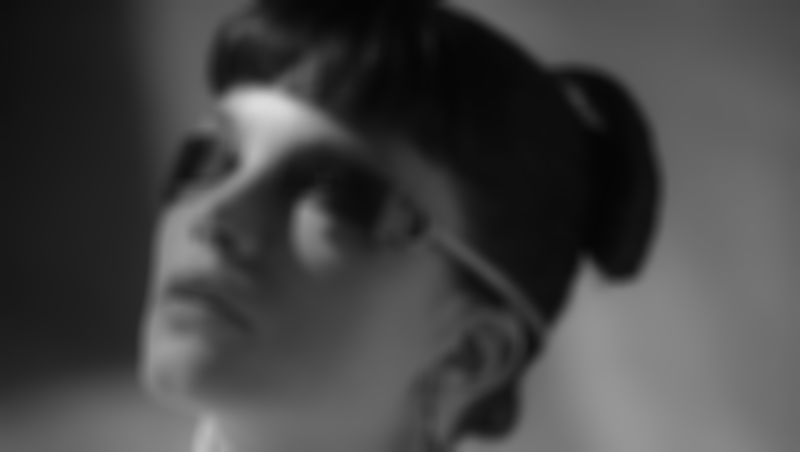

In [94]:
display(Image.fromarray(res1))

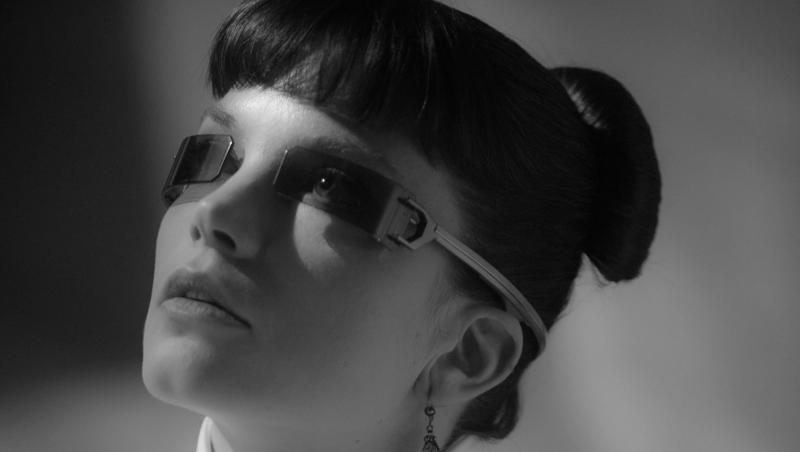

In [62]:
display(Image.fromarray(g_img1))

In [110]:
def Gauss_func(x, mu, sigma):
    return (1 / (sigma*(np.sqrt(2*np.pi)))) * np.exp((np.power((x-mu)/sigma, 2)) / (-2))

def Gauss_kernel(size, sigma=1):
    kernel_1d = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1d[i] = Gauss_func(kernel_1d[i], 0, sigma)
    kernel_2d = np.outer(kernel_1d.T, kernel_1d.T)

    kernel_2d *= 1.0 / kernel_2d.max()

    return kernel_2d

In [89]:
Gauss_kernel(5, 1)

array([[0.00291502, 0.01306423, 0.02153928, 0.01306423, 0.00291502],
       [0.01306423, 0.05854983, 0.09653235, 0.05854983, 0.01306423],
       [0.02153928, 0.09653235, 0.15915494, 0.09653235, 0.02153928],
       [0.01306423, 0.05854983, 0.09653235, 0.05854983, 0.01306423],
       [0.00291502, 0.01306423, 0.02153928, 0.01306423, 0.00291502]])

In [98]:
g_img1.shape

(452, 800)

In [111]:
def kernel_index(n):
    if n % 2 == 0:
        raise ValueError("Kernel matrix size must be odd number!")
    half = n//2
    for i in range(n):
        yield i-half

In [123]:
def get_custom_Gauss_blur(g_img, kernel_n=7, sigma=6):
    new_img = np.zeros(g_img.shape)
    kernel = Gauss_kernel(kernel_n, sigma)

    count = 0

    for i in range(g_img.shape[0]):
        for j in range(g_img.shape[1]):
            tmp_kernel = np.zeros(kernel.shape)
            gen_kern_ind_x = kernel_index(kernel_n)
            for k in range(kernel_n):
                x = next(gen_kern_ind_x)
                gen_kern_ind_y = kernel_index(kernel_n)
                for m in range(kernel_n):
                    y = next(gen_kern_ind_y)
                    try:
                        tmp_kernel[k,m] = kernel[k,m]*g_img[i+x,j+y]
                    except:
                        tmp_kernel[k,m] = 0
            new_img[i,j] = np.sum(tmp_kernel)/(kernel_n**2)
    
    return np.uint8(new_img)

In [128]:
g_img1_new = get_custom_Gauss_blur(g_img1, 17, 20)

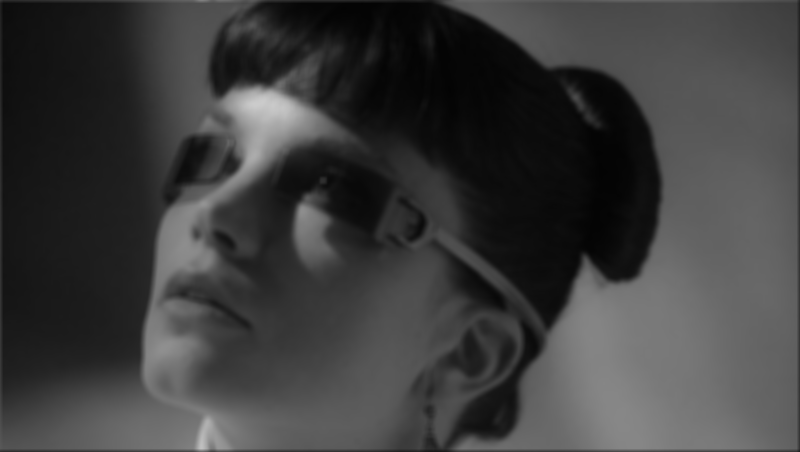

In [127]:
display(Image.fromarray(g_img1_new))

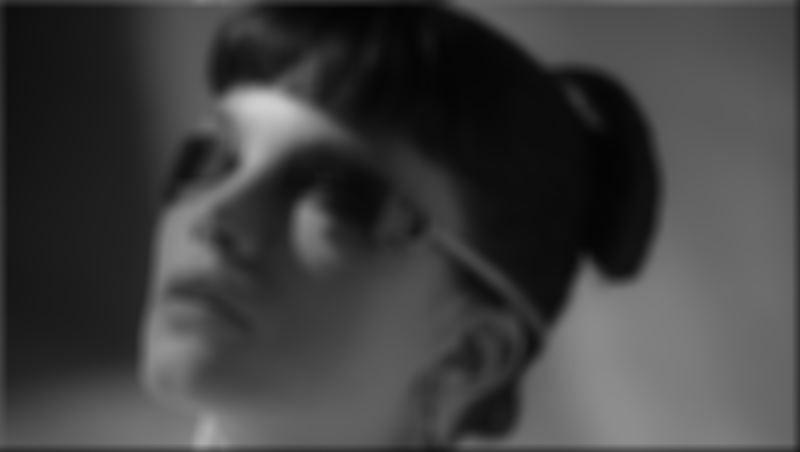

In [129]:
display(Image.fromarray(g_img1_new))

In [139]:
def create_save_folder():
    import pathlib as path
    p = path.Path("../save/lab_01")
    p.mkdir(parents=True, exist_ok=True)
    return str(p.absolute())

In [140]:
create_save_folder()

'c:\\Users\\igors\\My_Code\\sem_vi\\DPS\\lab_01\\..\\save\\lab_01'

In [119]:
res1

array([[ 14,  14,  14, ...,  68,  68,  68],
       [ 14,  14,  14, ...,  68,  68,  68],
       [ 14,  14,  14, ...,  68,  68,  68],
       ...,
       [ 93,  93,  93, ..., 108, 108, 108],
       [ 93,  93,  93, ..., 108, 108, 108],
       [ 93,  93,  93, ..., 108, 108, 108]], dtype=uint8)

In [121]:
g_img1

array([[ 13,  13,  13, ...,  67,  67,  67],
       [ 13,  13,  13, ...,  66,  66,  66],
       [ 13,  13,  13, ...,  66,  65,  65],
       ...,
       [ 93,  94,  94, ..., 107, 107, 107],
       [ 94,  94,  95, ..., 107, 107, 107],
       [ 94,  94,  95, ..., 107, 107, 107]], dtype=uint8)

In [120]:
g_img1_new

array([[56.35967323, 51.61230214, 47.08068679, ..., 65.37575744,
        54.46453191, 43.20518187],
       [47.93284134, 42.3533162 , 37.05797296, ..., 60.82014809,
        50.67260501, 40.1925459 ],
       [39.89548155, 33.51406383, 27.47070187, ..., 56.57479992,
        47.14025554, 37.38599972],
       ...,
       [77.28729308, 75.89874601, 74.5220022 , ..., 72.33728787,
        60.28238604, 47.83213183],
       [64.676587  , 63.53507606, 62.39554273, ..., 60.50582243,
        50.42277134, 40.00891523],
       [51.44925532, 50.5462555 , 49.63691706, ..., 48.15880139,
        40.13349933, 31.84477111]])